# Evaluation of the different Anomly Scores

In [1]:
import numpy as np
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import axis, colorbar, imshow, show, figure, subplot
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib import cm
%matplotlib inline

import os, sys, inspect
import csv

import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
save_plots = False

## Utils

In [3]:
from utils_vae_eval_paths import *

HISTORY_PATH = f'{potatodir}/saved_models'
PATH = MEASUREMENTS_FOLDER
FIGURES_FOLDER = FIGURES_FOLDER

In [4]:
def mean_of_mean(allMeans):
    """
    compute the mean of means and its standard error.
    """
    MeanOfMean = allMeans.mean()
    err = allMeans.std(ddof=1) / np.sqrt(len(allMeans))
    return MeanOfMean, err

## Evaluation Metrics: Compute Mean Results and their Errors

In [5]:
pd.options.display.float_format = "{:,.3}".format

COLUMN_NAMES = ['auc_score', 'specificity', 'sensitivity', 'precision', 
                'macro_f1', 'accuracy', 'misclassification', 
                'accuracy_metal', 'accuracy_hollow', 'sensitivity_metal', 'sensitivity_hollow']

In [6]:
latent_dim = 32

### SE

In [7]:
filename = f'J{latent_dim}_AR50'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}',
                            f'{COLUMN_NAMES[7]}', f'{COLUMN_NAMES[8]}', f'{COLUMN_NAMES[9]}', f'{COLUMN_NAMES[10]}'])
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]


# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES

# save accuracy score:
ACC_SE    = res['accuracy'][0]
ACCERR_SE = res['accuracy'][1]

AUC_SE    = res['auc_score'][0]
AUCERR_SE = res['auc_score'][1]

# save class error rates:
SE_MIS_PERFECT    = 1 - res['specificity'][0]
SE_MISERR_PERFECT = res['specificity'][1]
SE_MIS_METAL      = 1 - res['sensitivity_metal'][0]
SE_MISERR_METAL   = res['sensitivity_metal'][1]
SE_MIS_HOLLOW     = 1 - res['sensitivity_hollow'][0]
SE_MISERR_HOLLOW  = res['sensitivity_hollow'][1]
SE_MIS_TOTAL      = res['misclassification'][0]
SE_MISERR_TOTAL   = res['misclassification'][1]

res

J32_AR50


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification,accuracy_metal,accuracy_hollow,sensitivity_metal,sensitivity_hollow
mean of mean,0.904,0.844,0.818,0.841,0.831,0.831,0.169,0.875,0.794,0.939,0.697
error (+/-),0.00146,0.00883,0.0103,0.00596,0.00197,0.002,0.002,0.00464,0.00932,0.00465,0.017


### SSIM

In [8]:
filename = f'J{latent_dim}_SSIM'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}',
                            f'{COLUMN_NAMES[7]}', f'{COLUMN_NAMES[8]}', f'{COLUMN_NAMES[9]}', f'{COLUMN_NAMES[10]}'])

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES

# save accuracy score:
ACC_SSIM    = res['accuracy'][0]
ACCERR_SSIM = res['accuracy'][1]

AUC_SSIM    = res['auc_score'][0]
AUCERR_SSIM = res['auc_score'][1]


# save class error rates:
SSIM_MIS_PERFECT    = 1 - res['specificity'][0]
SSIM_MISERR_PERFECT = res['specificity'][1]
SSIM_MIS_METAL      = 1 - res['sensitivity_metal'][0]
SSIM_MISERR_METAL   = res['sensitivity_metal'][1]
SSIM_MIS_HOLLOW     = 1 - res['sensitivity_hollow'][0]
SSIM_MISERR_HOLLOW  = res['sensitivity_hollow'][1]
SSIM_MIS_TOTAL      = res['misclassification'][0]
SSIM_MISERR_TOTAL   = res['misclassification'][1]

res

J32_SSIM


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification,accuracy_metal,accuracy_hollow,sensitivity_metal,sensitivity_hollow
mean of mean,0.951,0.886,0.884,0.887,0.885,0.885,0.115,0.894,0.854,0.909,0.858
error (+/-),0.00104,0.00729,0.00672,0.00591,0.00185,0.00186,0.00186,0.00481,0.00828,0.00315,0.0124


### ZNCC

In [9]:
filename = f'J{latent_dim}_ZNCC'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}',
                            f'{COLUMN_NAMES[7]}', f'{COLUMN_NAMES[8]}', f'{COLUMN_NAMES[9]}', f'{COLUMN_NAMES[10]}'])

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES

# save accuracy score:
ACC_ZNCC    = res['accuracy'][0]
ACCERR_ZNCC = res['accuracy'][1]

AUC_ZNCC    = res['auc_score'][0]
AUCERR_ZNCC = res['auc_score'][1]

# save class error rates:
ZNCC_MIS_PERFECT    = 1 - res['specificity'][0]
ZNCC_MISERR_PERFECT = res['specificity'][1]
ZNCC_MIS_METAL      = 1 - res['sensitivity_metal'][0]
ZNCC_MISERR_METAL   = res['sensitivity_metal'][1]
ZNCC_MIS_HOLLOW     = 1 - res['sensitivity_hollow'][0]
ZNCC_MISERR_HOLLOW  = res['sensitivity_hollow'][1]
ZNCC_MIS_TOTAL      = res['misclassification'][0]
ZNCC_MISERR_TOTAL   = res['misclassification'][1]

res

J32_ZNCC


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification,accuracy_metal,accuracy_hollow,sensitivity_metal,sensitivity_hollow
mean of mean,0.891,0.836,0.805,0.832,0.82,0.821,0.179,0.866,0.783,0.925,0.685
error (+/-),0.00193,0.00633,0.0064,0.00444,0.00187,0.00186,0.00186,0.00358,0.00681,0.00408,0.0104


### GMSD

In [10]:
filename = f'J{latent_dim}_GMSD'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}',
                            f'{COLUMN_NAMES[7]}', f'{COLUMN_NAMES[8]}', f'{COLUMN_NAMES[9]}', f'{COLUMN_NAMES[10]}'])

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES

# save accuracy score:
ACC_GMSD    = res['accuracy'][0]
ACCERR_GMSD = res['accuracy'][1]

AUC_GMSD    = res['auc_score'][0]
AUCERR_GMSD = res['auc_score'][1]

# save class error rates:
GMSD_MIS_PERFECT    = 1 - res['specificity'][0]
GMSD_MISERR_PERFECT = res['specificity'][1]
GMSD_MIS_METAL      = 1 - res['sensitivity_metal'][0]
GMSD_MISERR_METAL   = res['sensitivity_metal'][1]
GMSD_MIS_HOLLOW     = 1 - res['sensitivity_hollow'][0]
GMSD_MISERR_HOLLOW  = res['sensitivity_hollow'][1]
GMSD_MIS_TOTAL      = res['misclassification'][0]
GMSD_MISERR_TOTAL   = res['misclassification'][1]

res

J32_GMSD


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification,accuracy_metal,accuracy_hollow,sensitivity_metal,sensitivity_hollow
mean of mean,0.849,0.774,0.777,0.777,0.776,0.776,0.224,0.786,0.72,0.808,0.747
error (+/-),0.00189,0.0109,0.0117,0.00642,0.00236,0.00234,0.00234,0.00526,0.0107,0.00852,0.0166


### IMED

In [11]:
filename = f'J{latent_dim}_IMED'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}',
                            f'{COLUMN_NAMES[7]}', f'{COLUMN_NAMES[8]}', f'{COLUMN_NAMES[9]}', f'{COLUMN_NAMES[10]}'])

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES

# save accuracy score:
ACC_IMED    = res['accuracy'][0]
ACCERR_IMED = res['accuracy'][1]

AUC_IMED    = res['auc_score'][0]
AUCERR_IMED = res['auc_score'][1]

# save class error rates:
IMED_MIS_PERFECT    = 1 - res['specificity'][0]
IMED_MISERR_PERFECT = res['specificity'][1]
IMED_MIS_METAL      = 1 - res['sensitivity_metal'][0]
IMED_MISERR_METAL   = res['sensitivity_metal'][1]
IMED_MIS_HOLLOW     = 1 - res['sensitivity_hollow'][0]
IMED_MISERR_HOLLOW  = res['sensitivity_hollow'][1]
IMED_MIS_TOTAL      = res['misclassification'][0]
IMED_MISERR_TOTAL   = res['misclassification'][1]

res

J32_IMED


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification,accuracy_metal,accuracy_hollow,sensitivity_metal,sensitivity_hollow
mean of mean,0.904,0.847,0.813,0.843,0.83,0.83,0.17,0.877,0.796,0.938,0.689
error (+/-),0.00112,0.00617,0.00791,0.00427,0.00169,0.00167,0.00167,0.0038,0.00655,0.00287,0.0147


### Bar Plot over Accuracy

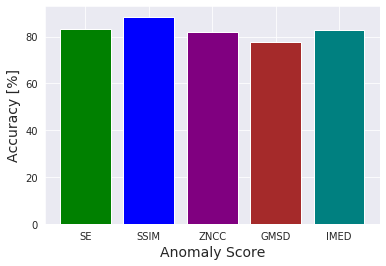

In [12]:
N = 5
ANOMALY_SCORE  = ['SE','SSIM','ZNCC','GMSD','IMED']
ACCURACY       = (ACC_SE*100, ACC_SSIM*100, ACC_ZNCC*100, ACC_GMSD*100, ACC_IMED*100)
STD_ERROR      = (ACCERR_SE*100, ACCERR_SSIM*100, ACCERR_ZNCC*100, ACCERR_GMSD*100, ACCERR_IMED*100)

New_Colors = ['green','blue','purple','brown','teal']
plt.bar(ANOMALY_SCORE, ACCURACY, color=New_Colors)
plt.xlabel('Anomaly Score', fontsize=14)
plt.ylabel('Accuracy [%]', fontsize=14)
plt.grid(True)
plt.show()

### Average Class Misclassifications/Error Rates

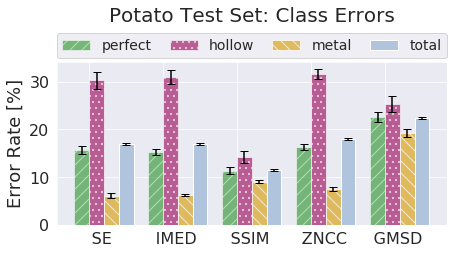

In [13]:
N = 5
ANOMALY_SCORE  = ['SE','IMED', 'SSIM','ZNCC','GMSD']

ERR_RATE_PERFECT = (SE_MIS_PERFECT*100, IMED_MIS_PERFECT*100, SSIM_MIS_PERFECT*100, ZNCC_MIS_PERFECT*100, GMSD_MIS_PERFECT*100)
STD_ERR_PERFECT  = (SE_MISERR_PERFECT*100, IMED_MISERR_PERFECT*100, SSIM_MISERR_PERFECT*100, ZNCC_MISERR_PERFECT*100, GMSD_MISERR_PERFECT*100)

ERR_RATE_METAL = (SE_MIS_METAL*100, IMED_MIS_METAL*100, SSIM_MIS_METAL*100, ZNCC_MIS_METAL*100, GMSD_MIS_METAL*100)
STD_ERR_METAL  = (SE_MISERR_METAL*100, IMED_MISERR_METAL*100, SSIM_MISERR_METAL*100, ZNCC_MISERR_METAL*100, GMSD_MISERR_METAL*100)

ERR_RATE_HOLLOW = (SE_MIS_HOLLOW*100, IMED_MIS_HOLLOW*100, SSIM_MIS_HOLLOW*100, ZNCC_MIS_HOLLOW*100, GMSD_MIS_HOLLOW*100)
STD_ERR_HOLLOW  = (SE_MISERR_HOLLOW*100, IMED_MISERR_HOLLOW*100, SSIM_MISERR_HOLLOW*100, ZNCC_MISERR_HOLLOW*100, GMSD_MISERR_HOLLOW*100)

ERR_RATE_TOTAL = (SE_MIS_TOTAL*100, IMED_MIS_TOTAL*100, SSIM_MIS_TOTAL*100, ZNCC_MIS_TOTAL*100, GMSD_MIS_TOTAL*100)
STD_ERR_TOTAL  = (SE_MISERR_TOTAL*100, IMED_MISERR_TOTAL*100, SSIM_MISERR_TOTAL*100, ZNCC_MISERR_TOTAL*100, GMSD_MISERR_TOTAL*100)

"""
========
Barchart
========
A bar plot with errorbars and height labels on individual bars
Source: https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
"""
sns.set_style("darkgrid")
LARGE_FONT  = 20
MEDIUM_FONT = 18
SMALL_FONT  = 16

ind = np.arange(N)  # the x locations for the groups
width0 = -0.2
width = 0.2       # the width of the bars
width2 = 0.4       # the width of the bars
width3 = 0.6       # the width of the bars

fig, ax = plt.subplots(figsize=(7, 3))
rects1 = ax.bar(ind, ERR_RATE_PERFECT, width0, align="center", color='g', hatch=r"//", alpha=0.5, 
                yerr=STD_ERR_PERFECT, linewidth=1, capsize=4, label='perfect')

rects2 = ax.bar(ind + width, ERR_RATE_HOLLOW, width0, align="center", color='#960056', hatch=r".s.s", alpha=0.6, 
                yerr=STD_ERR_HOLLOW, linewidth=1, capsize=4, label='hollow')

rects3 = ax.bar(ind + width2, ERR_RATE_METAL, width0, align="center", color='goldenrod', hatch=r"\\", alpha=0.7, 
                yerr=STD_ERR_METAL, linewidth=1, capsize=4, label='metal')

rects4 = ax.bar(ind + width3, ERR_RATE_TOTAL, width0, align="center", color='lightsteelblue', hatch=r"", alpha=1., 
                yerr=STD_ERR_TOTAL, linewidth=1, capsize=4, label='total')

# add some text for labels, title and axes ticks
ax.set_title('Potato Test Set: Class Errors', fontsize=LARGE_FONT, pad=40)
ax.set_ylabel('Error Rate [%]', fontsize=MEDIUM_FONT)
ax.set_xticks([]) 
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('     SE', '     IMED', '     SSIM', '     ZNCC', '     GMSD'), fontsize=MEDIUM_FONT)
plt.tick_params(axis='both', which='major', labelsize=SMALL_FONT)

ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc='lower left', mode='expand', borderaxespad=0, ncol=4,
               numpoints=1, fontsize=14) 

save_plots=False
if (save_plots):
    plt.savefig(f"{FIGURES_FOLDER}/class_errors_potato.png", dpi=300, bbox_inches='tight')
plt.show()

## Stat. on ROC Curve


In [14]:
import re

def make_dataframe(df, column_name=column_name):
    
    def convert_str_to_float(df, column_name=column_name, row_number=0):
        def urlify(s):
            """
            Source: https://stackoverflow.com/questions/1007481/how-do-i-replace-whitespaces-with-underscore
            """
            # Remove all non-word characters (everything except numbers and letters)
            #s = re.sub(r"[^\w\s]", '', s)

            # Replace all runs of whitespace with a single dash
            s = re.sub(r"\s+", ',', s)
            return s
        
        """ convert to numpy arrays """
        # remove white space from string type:
        column = df[f'{column_name}'][row_number]
        string = urlify(column)

        # convert from string to list:
        listRes = string.strip('][').split(',')
        listRes = listRes[:-1]                        # delete last white element space 

        # convert from list to (float) numpy array
        array = np.array(listRes, dtype=np.float64)
        return array
    
    """ contruct new dataframe """
    # construct column names:
    N = len(df[f'{column_name}'])
    set_column_names = []
    for i in range(N):
        set_column_names.append(f'n={i}')
    
    # make new dataframe:
    df_new = pd.DataFrame(columns=set_column_names)
    for row_number in range(len(df[f'{column_name}'])):
        array = convert_str_to_float(df, column_name=column_name, row_number=row_number)

        for j in range(len(array)):
            df_new.loc[j, f'{set_column_names[row_number]}'] = array[j]
    return df_new    

In [15]:
COLUMN_NAMES = ['fpr', 'tpr']

### Get Data

#### SE

In [16]:
filename = f'J{latent_dim}_AR50'

""" extract FPR """
COLUMN_NAME = 'fpr'
df = pd.read_csv(f"{PATH}/{filename}.csv",
                usecols = [f'{COLUMN_NAME}']
                ) 
print (filename, COLUMN_NAME)

df_fpr = make_dataframe(df, column_name=COLUMN_NAME)
#df_fpr

# compute and add quantiles to dataframe:
df_fpr['Q1'] = df_fpr.astype(float).quantile(q=0.25, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_fpr['Q2'] = df_fpr.astype(float).quantile(q=0.50, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_fpr['Q3'] = df_fpr.astype(float).quantile(q=0.75, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
#df_fpr

# save as numpy arrays:
SE_fprQ1 = df_fpr['Q1'].to_numpy()
SE_fprQ2 = df_fpr['Q2'].to_numpy()
SE_fprQ3 = df_fpr['Q3'].to_numpy()

""" extract TPR """
COLUMN_NAME = 'tpr'
df = pd.read_csv(f"{PATH}/{filename}.csv",
                usecols = [f'{COLUMN_NAME}']
                ) 
print (filename, COLUMN_NAME)

# convert to dataframe:
df_tpr = make_dataframe(df, column_name=COLUMN_NAME)

# compute and add quantiles to dataframe:
df_tpr['Q1'] = df_tpr.astype(float).quantile(q=0.25, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_tpr['Q2'] = df_tpr.astype(float).quantile(q=0.50, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_tpr['Q3'] = df_tpr.astype(float).quantile(q=0.75, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
#df_tpr

# save as numpy arrays:
SE_tprQ1 = df_tpr['Q1'].to_numpy()
SE_tprQ2 = df_tpr['Q2'].to_numpy()
SE_tprQ3 = df_tpr['Q3'].to_numpy()

J32_AR50 fpr
J32_AR50 tpr


#### SSIM

In [17]:
filename = f'J{latent_dim}_SSIM'

""" extract FPR """
COLUMN_NAME = 'fpr'
df = pd.read_csv(f"{PATH}/{filename}.csv",
                usecols = [f'{COLUMN_NAME}']
                ) 
print (filename, COLUMN_NAME)

df_fpr = make_dataframe(df, column_name=COLUMN_NAME)
#df_fpr

# compute and add quantiles to dataframe:
df_fpr['Q1'] = df_fpr.astype(float).quantile(q=0.25, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_fpr['Q2'] = df_fpr.astype(float).quantile(q=0.50, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_fpr['Q3'] = df_fpr.astype(float).quantile(q=0.75, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
#df_fpr

# save as numpy arrays:
SSIM_fprQ1 = df_fpr['Q1'].to_numpy()
SSIM_fprQ2 = df_fpr['Q2'].to_numpy()
SSIM_fprQ3 = df_fpr['Q3'].to_numpy()

""" extract TPR """
COLUMN_NAME = 'tpr'
df = pd.read_csv(f"{PATH}/{filename}.csv",
                usecols = [f'{COLUMN_NAME}']
                ) 
print (filename, COLUMN_NAME)

# convert to dataframe:
df_tpr = make_dataframe(df, column_name=COLUMN_NAME)

# compute and add quantiles to dataframe:
df_tpr['Q1'] = df_tpr.astype(float).quantile(q=0.25, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_tpr['Q2'] = df_tpr.astype(float).quantile(q=0.50, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_tpr['Q3'] = df_tpr.astype(float).quantile(q=0.75, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
#df_tpr

# save as numpy arrays:
SSIM_tprQ1 = df_tpr['Q1'].to_numpy()
SSIM_tprQ2 = df_tpr['Q2'].to_numpy()
SSIM_tprQ3 = df_tpr['Q3'].to_numpy()

J32_SSIM fpr
J32_SSIM tpr


#### ZNCC

In [18]:
filename = f'J{latent_dim}_ZNCC'

""" extract FPR """
COLUMN_NAME = 'fpr'
df = pd.read_csv(f"{PATH}/{filename}.csv",
                usecols = [f'{COLUMN_NAME}']
                ) 
print (filename, COLUMN_NAME)

df_fpr = make_dataframe(df, column_name=COLUMN_NAME)
#df_fpr

# compute and add quantiles to dataframe:
df_fpr['Q1'] = df_fpr.astype(float).quantile(q=0.25, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_fpr['Q2'] = df_fpr.astype(float).quantile(q=0.50, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_fpr['Q3'] = df_fpr.astype(float).quantile(q=0.75, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
#df_fpr

# save as numpy arrays:
ZNCC_fprQ1 = df_fpr['Q1'].to_numpy()
ZNCC_fprQ2 = df_fpr['Q2'].to_numpy()
ZNCC_fprQ3 = df_fpr['Q3'].to_numpy()

""" extract TPR """
COLUMN_NAME = 'tpr'
df = pd.read_csv(f"{PATH}/{filename}.csv",
                usecols = [f'{COLUMN_NAME}']
                ) 
print (filename, COLUMN_NAME)

# convert to dataframe:
df_tpr = make_dataframe(df, column_name=COLUMN_NAME)

# compute and add quantiles to dataframe:
df_tpr['Q1'] = df_tpr.astype(float).quantile(q=0.25, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_tpr['Q2'] = df_tpr.astype(float).quantile(q=0.50, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_tpr['Q3'] = df_tpr.astype(float).quantile(q=0.75, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
#df_tpr

# save as numpy arrays:
ZNCC_tprQ1 = df_tpr['Q1'].to_numpy()
ZNCC_tprQ2 = df_tpr['Q2'].to_numpy()
ZNCC_tprQ3 = df_tpr['Q3'].to_numpy()

J32_ZNCC fpr
J32_ZNCC tpr


#### GMSD

In [19]:
filename = f'J{latent_dim}_GMSD'

""" extract FPR """
COLUMN_NAME = 'fpr'
df = pd.read_csv(f"{PATH}/{filename}.csv",
                usecols = [f'{COLUMN_NAME}']
                ) 
print (filename, COLUMN_NAME)

df_fpr = make_dataframe(df, column_name=COLUMN_NAME)
#df_fpr

# compute and add quantiles to dataframe:
df_fpr['Q1'] = df_fpr.astype(float).quantile(q=0.25, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_fpr['Q2'] = df_fpr.astype(float).quantile(q=0.50, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_fpr['Q3'] = df_fpr.astype(float).quantile(q=0.75, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
#df_fpr

# save as numpy arrays:
GMSD_fprQ1 = df_fpr['Q1'].to_numpy()
GMSD_fprQ2 = df_fpr['Q2'].to_numpy()
GMSD_fprQ3 = df_fpr['Q3'].to_numpy()

""" extract TPR """
COLUMN_NAME = 'tpr'
df = pd.read_csv(f"{PATH}/{filename}.csv",
                usecols = [f'{COLUMN_NAME}']
                ) 
print (filename, COLUMN_NAME)

# convert to dataframe:
df_tpr = make_dataframe(df, column_name=COLUMN_NAME)

# compute and add quantiles to dataframe:
df_tpr['Q1'] = df_tpr.astype(float).quantile(q=0.25, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_tpr['Q2'] = df_tpr.astype(float).quantile(q=0.50, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_tpr['Q3'] = df_tpr.astype(float).quantile(q=0.75, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
#df_tpr

# save as numpy arrays:
GMSD_tprQ1 = df_tpr['Q1'].to_numpy()
GMSD_tprQ2 = df_tpr['Q2'].to_numpy()
GMSD_tprQ3 = df_tpr['Q3'].to_numpy()

J32_GMSD fpr
J32_GMSD tpr


#### IMED

In [20]:
filename = f'J{latent_dim}_IMED'

""" extract FPR """
COLUMN_NAME = 'fpr'
df = pd.read_csv(f"{PATH}/{filename}.csv",
                usecols = [f'{COLUMN_NAME}']
                ) 
print (filename, COLUMN_NAME)

df_fpr = make_dataframe(df, column_name=COLUMN_NAME)
#df_fpr

# compute and add quantiles to dataframe:
df_fpr['Q1'] = df_fpr.astype(float).quantile(q=0.25, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_fpr['Q2'] = df_fpr.astype(float).quantile(q=0.50, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_fpr['Q3'] = df_fpr.astype(float).quantile(q=0.75, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
#df_fpr

# save as numpy arrays:
IMED_fprQ1 = df_fpr['Q1'].to_numpy()
IMED_fprQ2 = df_fpr['Q2'].to_numpy()
IMED_fprQ3 = df_fpr['Q3'].to_numpy()

""" extract TPR """
COLUMN_NAME = 'tpr'
df = pd.read_csv(f"{PATH}/{filename}.csv",
                usecols = [f'{COLUMN_NAME}']
                ) 
print (filename, COLUMN_NAME)

# convert to dataframe:
df_tpr = make_dataframe(df, column_name=COLUMN_NAME)

# compute and add quantiles to dataframe:
df_tpr['Q1'] = df_tpr.astype(float).quantile(q=0.25, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_tpr['Q2'] = df_tpr.astype(float).quantile(q=0.50, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_tpr['Q3'] = df_tpr.astype(float).quantile(q=0.75, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
#df_tpr

# save as numpy arrays:
IMED_tprQ1 = df_tpr['Q1'].to_numpy()
IMED_tprQ2 = df_tpr['Q2'].to_numpy()
IMED_tprQ3 = df_tpr['Q3'].to_numpy()

J32_IMED fpr
J32_IMED tpr


### Plot

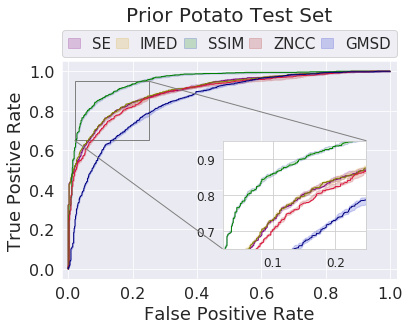

In [21]:
LARGE_FRONT  = 20
MEDIUM_FRONT = 18
SMALL_FRONT  = 16

sns.set_style("darkgrid")
mpl.rcParams['legend.handlelength'] = 0.8
fig, ax = plt.subplots(1, 1, figsize = (6, 4))

lw = 1.0

ax.plot(SE_fprQ2 , SE_tprQ2, '-', color='purple', lw=lw)
ax.fill_between(SE_fprQ2, SE_tprQ1, SE_tprQ3, alpha=0.2, edgecolor='purple', facecolor='purple', linewidth=1, 
                antialiased=True, label='SE')
 
ax.plot(IMED_fprQ2 , IMED_tprQ2, '-', color='olive', lw=lw)
ax.fill_between(IMED_fprQ2, IMED_tprQ1, IMED_tprQ3, alpha=0.2, edgecolor='goldenrod', facecolor='goldenrod', linewidth=1, 
                antialiased=True, label='IMED')

ax.plot(SSIM_fprQ2 , SSIM_tprQ2, '-', color='g', lw=lw)
ax.fill_between(SSIM_fprQ2, SSIM_tprQ1, SSIM_tprQ3, alpha=0.2, edgecolor='#1B2ACC', facecolor='g', linewidth=1, 
                antialiased=True, label='SSIM')

ax.plot(ZNCC_fprQ2 , ZNCC_tprQ2, '-', color='crimson', lw=lw)
ax.fill_between(ZNCC_fprQ2, ZNCC_tprQ1, ZNCC_tprQ3, alpha=0.2, edgecolor='firebrick', facecolor='firebrick', linewidth=1, 
                antialiased=True, label='ZNCC')

ax.plot(GMSD_fprQ2 , GMSD_tprQ2, '-', color='navy', lw=lw)
ax.fill_between(GMSD_fprQ2 , GMSD_tprQ1, GMSD_tprQ3, alpha=0.2, edgecolor='#1B2ACC', facecolor='#1B2ACC', linewidth=1, 
                antialiased=True, label='GMSD')

plt.xlabel('False Positive Rate', fontsize=MEDIUM_FRONT) 
plt.ylabel('True Postive Rate', fontsize=MEDIUM_FRONT)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.05, 1.05]) #plt.ylim([-0.02, 1.03])
plt.title("Prior Potato Test Set", fontsize=LARGE_FRONT, pad=40)
plt.tick_params(axis='both', which='major', labelsize=SMALL_FRONT)
ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc='lower left', mode='expand', borderaxespad=0, ncol=5,
               numpoints=1, fontsize=15) 

# Zoom in on data:
sns.set_style("whitegrid")
axins = inset_axes(ax, 2.0, 1.5, loc=4, borderpad=3)           # zoom-factor and location (loc)

axins.plot(SE_fprQ2 , SE_tprQ2, '-', color='purple', lw=lw)
axins.fill_between(SE_fprQ2, SE_tprQ1, SE_tprQ3, alpha=0.2, edgecolor='purple', facecolor='purple', linewidth=1, antialiased=True)

axins.plot(IMED_fprQ2 , IMED_tprQ2, '-', color='olive', lw=lw)
axins.fill_between(IMED_fprQ2, IMED_tprQ1, IMED_tprQ3, alpha=0.2, edgecolor='goldenrod', facecolor='goldenrod', linewidth=1, antialiased=True)

axins.plot(SSIM_fprQ2 , SSIM_tprQ2, '-', color='g', lw=lw)
axins.fill_between(SSIM_fprQ2, SSIM_tprQ1, SSIM_tprQ3, alpha=0.2, edgecolor='#1B2ACC', facecolor='g', linewidth=1, antialiased=True)

axins.plot(ZNCC_fprQ2 , ZNCC_tprQ2, '-', color='crimson', lw=lw)
axins.fill_between(ZNCC_fprQ2, ZNCC_tprQ1, ZNCC_tprQ3, alpha=0.2, edgecolor='firebrick', facecolor='firebrick', linewidth=1, antialiased=True)

axins.plot(GMSD_fprQ2 , GMSD_tprQ2, '-', color='navy', lw=lw)
axins.fill_between(GMSD_fprQ2 , GMSD_tprQ1, GMSD_tprQ3, alpha=0.2, edgecolor='#1B2ACC', facecolor='#1B2ACC', linewidth=1, antialiased=True)

x1, x2, y1, y2 = 0.02, 0.25, 0.65, 0.95                         # specify the limits
axins.set_xlim(x1, x2)                                          # apply the x-limits
axins.set_ylim(y1, y2)                                          # apply the y-limits
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")      # fancy zoom effect
axins.tick_params(axis='both', which='major', labelsize=12)

plt.gca()
#if (save_plots):
#    plt.savefig(f"{FIGURES_FOLDER}/ROCQuantiles_potato.png", dpi=300, bbox_inches='tight')
plt.show()

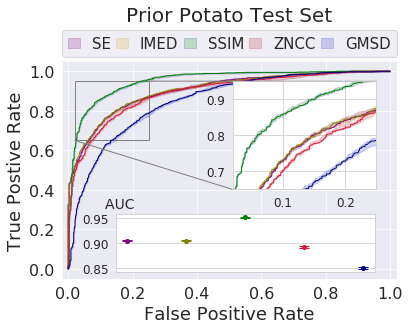

In [22]:
LARGE_FRONT  = 20
MEDIUM_FRONT = 18
SMALL_FRONT  = 16

sns.set_style("darkgrid")
mpl.rcParams['legend.handlelength'] = 0.8
fig, ax = plt.subplots(1, 1, figsize = (6, 4))

lw = 1.0

ax.plot(SE_fprQ2 , SE_tprQ2, '-', color='purple', lw=lw)
ax.fill_between(SE_fprQ2, SE_tprQ1, SE_tprQ3, alpha=0.2, edgecolor='purple', facecolor='purple', linewidth=1, 
                antialiased=True, label='SE')
 
ax.plot(IMED_fprQ2 , IMED_tprQ2, '-', color='olive', lw=lw)
ax.fill_between(IMED_fprQ2, IMED_tprQ1, IMED_tprQ3, alpha=0.2, edgecolor='goldenrod', facecolor='goldenrod', linewidth=1, 
                antialiased=True, label='IMED')

ax.plot(SSIM_fprQ2 , SSIM_tprQ2, '-', color='g', lw=lw)
ax.fill_between(SSIM_fprQ2, SSIM_tprQ1, SSIM_tprQ3, alpha=0.2, edgecolor='#1B2ACC', facecolor='g', linewidth=1, 
                antialiased=True, label='SSIM')

ax.plot(ZNCC_fprQ2 , ZNCC_tprQ2, '-', color='crimson', lw=lw)
ax.fill_between(ZNCC_fprQ2, ZNCC_tprQ1, ZNCC_tprQ3, alpha=0.2, edgecolor='firebrick', facecolor='firebrick', linewidth=1, 
                antialiased=True, label='ZNCC')

ax.plot(GMSD_fprQ2 , GMSD_tprQ2, '-', color='navy', lw=lw)
ax.fill_between(GMSD_fprQ2 , GMSD_tprQ1, GMSD_tprQ3, alpha=0.2, edgecolor='#1B2ACC', facecolor='#1B2ACC', linewidth=1, 
                antialiased=True, label='GMSD')

plt.xlabel('False Positive Rate', fontsize=MEDIUM_FRONT) 
plt.ylabel('True Postive Rate', fontsize=MEDIUM_FRONT)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.05, 1.05]) #plt.ylim([-0.02, 1.03])
plt.title("Prior Potato Test Set", fontsize=LARGE_FRONT, pad=40)
plt.tick_params(axis='both', which='major', labelsize=SMALL_FRONT)
ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc='lower left', mode='expand', borderaxespad=0, ncol=5,
               numpoints=1, fontsize=15) 

# Zoom in on data:
sns.set_style("whitegrid")
axins = inset_axes(ax, 2.0, 1.5, loc=1, borderpad=2)           # zoom-factor and location (loc)

axins.plot(SE_fprQ2 , SE_tprQ2, '-', color='purple', lw=lw)
axins.fill_between(SE_fprQ2, SE_tprQ1, SE_tprQ3, alpha=0.2, edgecolor='purple', facecolor='purple', linewidth=1, antialiased=True)

axins.plot(IMED_fprQ2 , IMED_tprQ2, '-', color='olive', lw=lw)
axins.fill_between(IMED_fprQ2, IMED_tprQ1, IMED_tprQ3, alpha=0.2, edgecolor='goldenrod', facecolor='goldenrod', linewidth=1, antialiased=True)

axins.plot(SSIM_fprQ2 , SSIM_tprQ2, '-', color='g', lw=lw)
axins.fill_between(SSIM_fprQ2, SSIM_tprQ1, SSIM_tprQ3, alpha=0.2, edgecolor='#1B2ACC', facecolor='g', linewidth=1, antialiased=True)

axins.plot(ZNCC_fprQ2 , ZNCC_tprQ2, '-', color='crimson', lw=lw)
axins.fill_between(ZNCC_fprQ2, ZNCC_tprQ1, ZNCC_tprQ3, alpha=0.2, edgecolor='firebrick', facecolor='firebrick', linewidth=1, antialiased=True)

axins.plot(GMSD_fprQ2 , GMSD_tprQ2, '-', color='navy', lw=lw)
axins.fill_between(GMSD_fprQ2 , GMSD_tprQ1, GMSD_tprQ3, alpha=0.2, edgecolor='#1B2ACC', facecolor='#1B2ACC', linewidth=1, antialiased=True)

x1, x2, y1, y2 = 0.02, 0.25, 0.65, 0.95                         # specify the limits
axins.set_xlim(x1, x2)                                          # apply the x-limits
axins.set_ylim(y1, y2)                                          # apply the y-limits
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")      # fancy zoom effect
axins.tick_params(axis='both', which='major', labelsize=12)


# Inset AUC scores:
sns.set_style("whitegrid")
inset = fig.add_axes([0.25, 0.15, 0.6, 0.2])
N = (1,2,3,4,5)
ALL_AUC    = (AUC_SE, AUC_IMED, AUC_SSIM, AUC_ZNCC, AUC_GMSD)
ALL_AUCERR = (AUCERR_SE, AUCERR_IMED, AUCERR_SSIM, AUCERR_ZNCC, AUCERR_GMSD)
colors = ['purple', 'olive', 'g', 'crimson', 'navy']
for pos, y, err, colors in zip(N, ALL_AUC, ALL_AUCERR, colors):
    inset.errorbar(pos, y, err, fmt="o", linewidth=2, elinewidth=2, capsize=5, capthick=1, markersize=4, color=colors)
#inset.set_ylabel('AUC', fontsize=12)
inset.set_title("AUC                                                        ", fontsize=14)
inset.set_xticks([]) 
inset.tick_params(axis='both', which='major', labelsize=12)

plt.gca()
if (save_plots):
    plt.savefig(f"{FIGURES_FOLDER}/ROCQuantiles_potato.png", dpi=300, bbox_inches='tight')
plt.show()